In [10]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):  # 生成混淆矩阵图
    """
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("显示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        # print(cm)
    else:
        # print('显示具体数字：')
        # print(cm)
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def show_matrix(y_pred, y_true):
    C = confusion_matrix(y_true, y_pred, labels=['0', '1', '2', '3','4', '5', '6', '7','8', '9'])  # 可将'1'等替换成自己的类别，如'cat'。生成混淆矩阵

    # plt.matshow(C, cmap=plt.cm.Reds) # 按自己需求更改颜色
    # attack_types = ['正常', '内圈0.1778', '内圈0.3556','内圈0.5334','外圈0.1778', '外圈0.3556','外圈0.5334','滚动体0.1778','滚动体0.3556','滚动体0.5334']
    attack_types = ['0', '1', '2', '3','4', '5', '6', '7','8', '9']

    plot_confusion_matrix(C, classes=attack_types, normalize=False, title='Normalized confusion matrix')

def run_matrix(model,path,name):  # 显示预测结果的混淆矩阵

    dataDE_B = case10.data_DE_win(650, 'B', steps=128)

    score1, y_pred, y_true = model_matrix(dataDE_B, model, path, name)
    y_true = list(map(str, y_true))
    y_pred = list(map(str, y_pred))
    print('%.2f ' % (score1))
    show_matrix(y_pred, y_true)

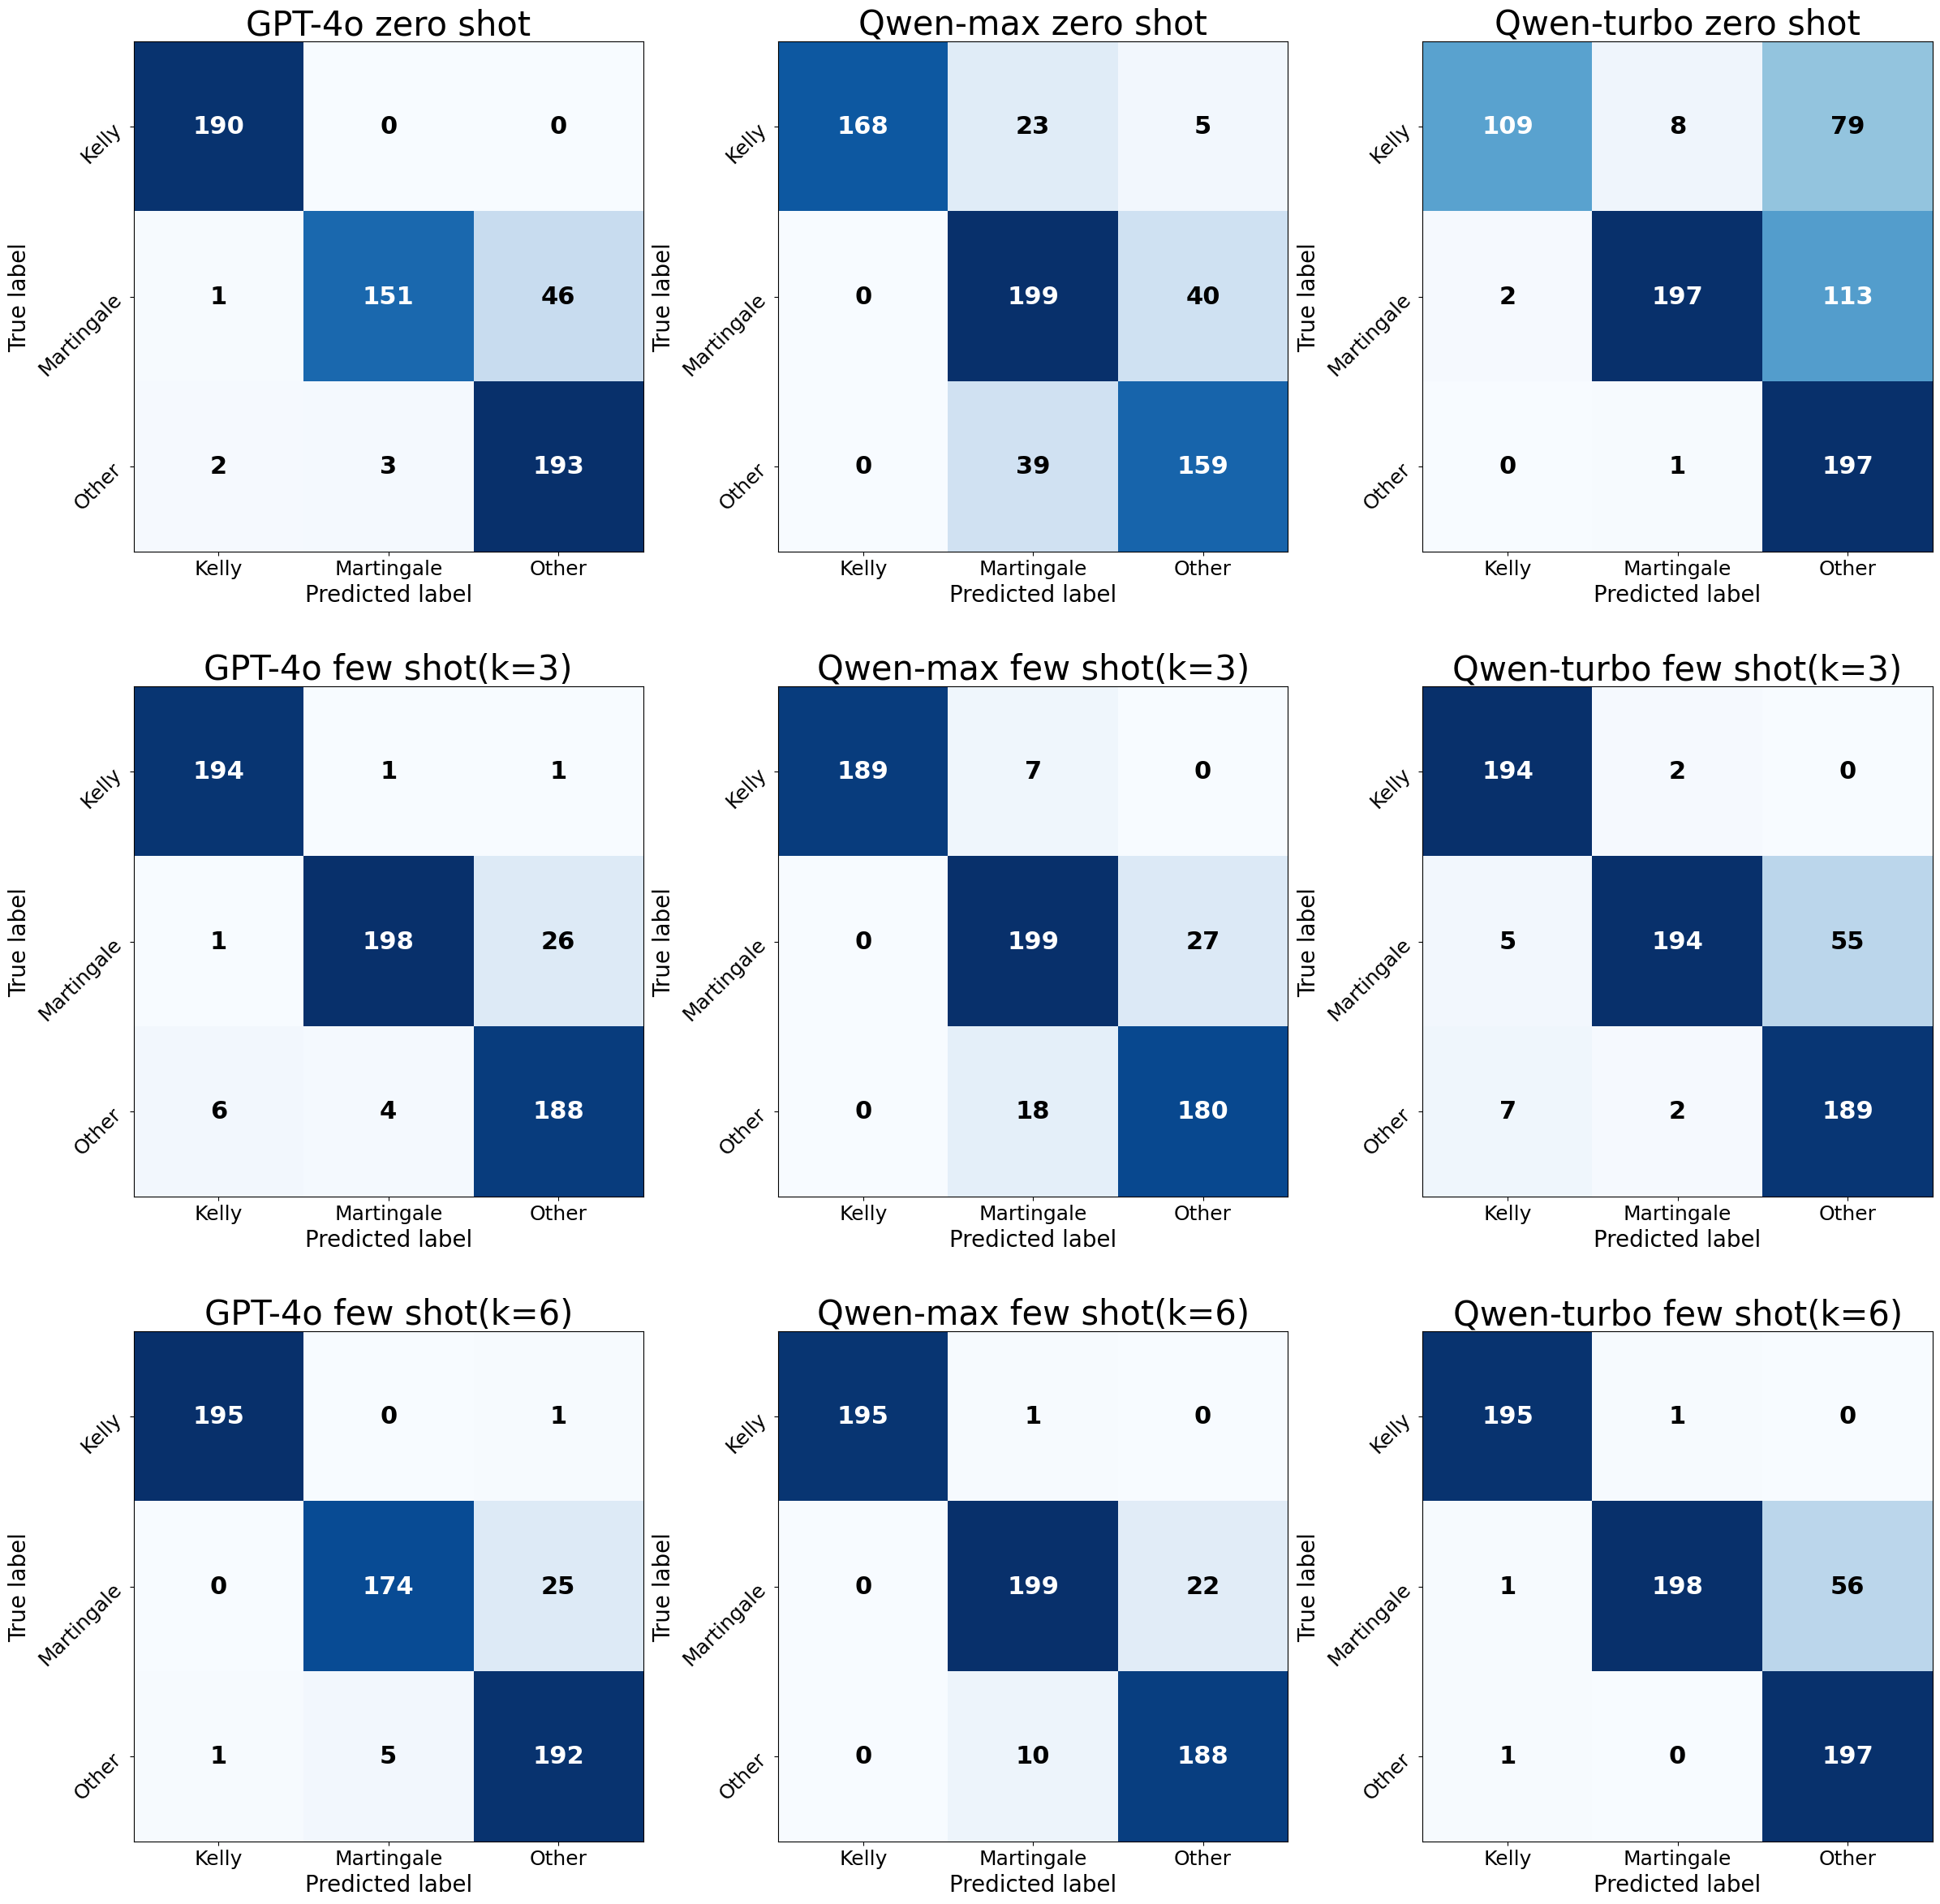

In [40]:
# 在三行显示九张混淆矩阵，每行最多三个，并调大字体
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
results = [
    ('GPT-4o zero shot', np.array([[190, 0, 0], [1, 151, 46], [2, 3, 193]])),
    ('Qwen-max zero shot', np.array([[168, 23, 5], [0, 199, 40], [0, 39, 159]])),
    ('Qwen-turbo zero shot', np.array([[109, 8, 79], [2, 197, 113], [0, 1, 197]])),
    ('GPT-4o few shot(k=3)', np.array([[194, 1, 1], [1, 198, 26], [6, 4, 188]])),
    ('Qwen-max few shot(k=3)', np.array([[189, 7, 0], [0, 199, 27], [0, 18, 180]])),
    ('Qwen-turbo few shot(k=3)', np.array([[194, 2, 0], [5, 194, 55], [7, 2, 189]])),
    ('GPT-4o few shot(k=6)', np.array([[195, 0, 1], [0, 174, 25], [1, 5, 192]])),
    ('Qwen-max few shot(k=6)', np.array([[195, 1, 0], [0, 199, 22], [0, 10, 188]])),
    ('Qwen-turbo few shot(k=6)', np.array([[195, 1, 0], [1, 198, 56], [1, 0, 197]])),
]
classes = ['Kelly', 'Martingale', 'Other']

fig, axes = plt.subplots(3, 3, figsize=(24, 24))
axes = axes.flatten()
ims = []
for idx, (model_name, cm) in enumerate(results):
    ax = axes[idx]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ims.append(im)
    ax.set_title(model_name, fontsize=30)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, fontsize=18)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, fontsize=18, rotation=45)
    ax.set_ylabel('True label', fontsize=20)
    ax.set_xlabel('Predicted label', fontsize=20)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=22, fontweight='bold')
# 隐藏多余的子图
for idx in range(len(results), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()
fig.savefig("confusion_matrices.pdf", format="pdf")